# Script _ Dynamique inflorescences DFG

L'objectif de ce script est, comme dans le fichier Lambda "Lambda vs Inflos (Paul)" situé dans le fichier courant, de trouver une dynamique de floraison avec les inflorescences aux stades D, F et G.

## Récupération des données

In [1]:
load("donnees.RData")

## Bloc 1 

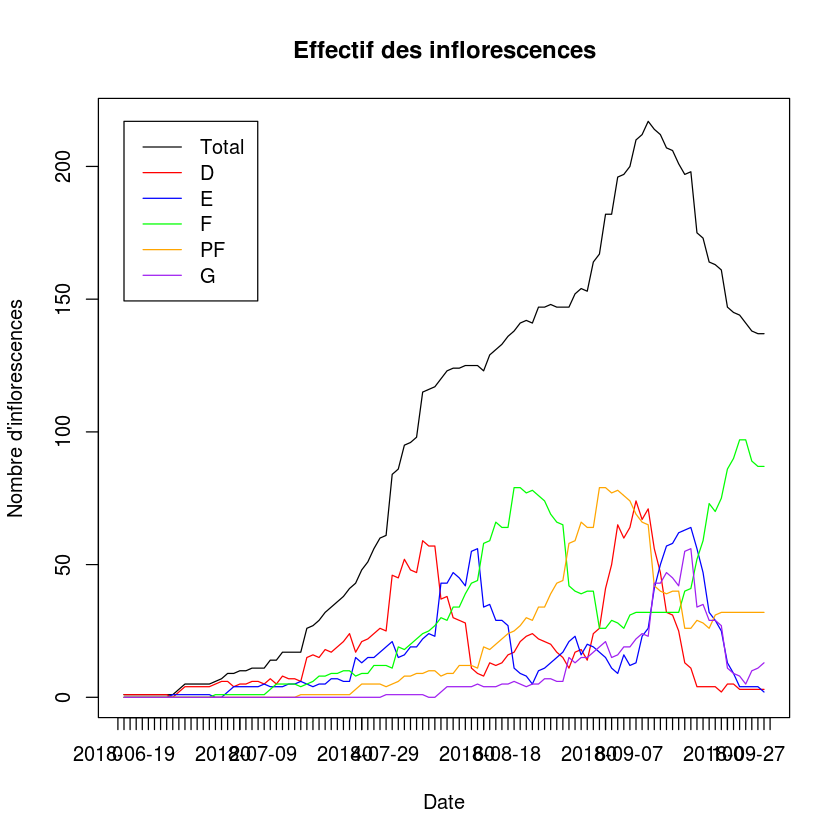

In [2]:
# Affichage des dynamiques de population des inflorescences en fonction de leur stade
plot(apply(stade_1, 2, sum),type='l',xlab="Date","ylab"="Nombre d'inflorescences")
axis(1,at=1:107, lab=as.character(date))
points(stade_1[1,],type='l',col='red')
points(stade_1[2,],type='l',col='blue')
points(stade_1[3,],type='l',col='green')
points(stade_1[4,],type='l',col='orange')
points(stade_1[5,],type='l',col='purple')
legend(1, max(apply(stade_1, 2, sum)), legend=c("Total","D","E","F","PF","G"),col=c("black","red", "blue","green","orange","purple"), lty=1)
title ("Effectif des inflorescences")

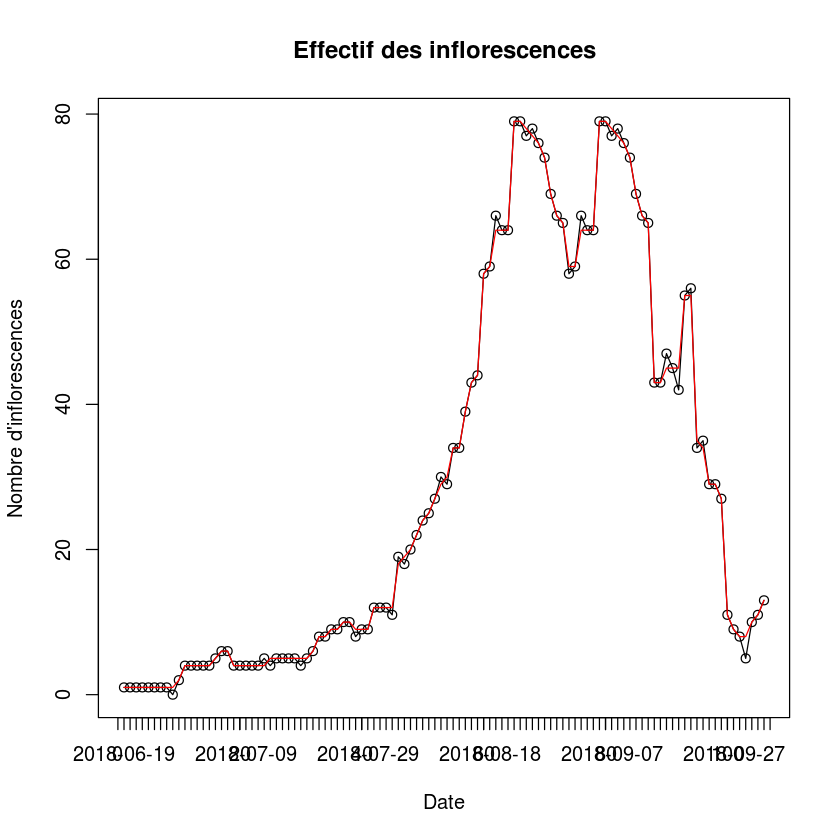

In [3]:
iE = 10
while(stade_1[1,iE]>stade_1[2,iE])
    iE = iE+1

iF = iE+1
while(stade_1[2,iF]>stade_1[3,iF])
    iF = iF+1

iPF = iF+1
while(stade_1[3,iPF]>stade_1[4,iPF])
    iPF = iPF+1

iG = iPF+1
while(stade_1[4,iG]>stade_1[5,iG])
    iG = iG+1

NbInfloDEFPFG_1 = c(stade_1[1,1:(iE-1)],stade_1[2,iE:(iF-1)],stade_1[3,iF:(iPF-1)],stade_1[4,iPF:(iG-1)],stade_1[5,iG:dim(stade_1)[2]])

plot(NbInfloDEFPFG_1,type='o',xlab="Date","ylab"="Nombre d'inflorescences")
axis(1,at=1:107, lab=as.character(date))
points(smooth(NbInfloDEFPFG_1),type='l',col='red')
title ("Effectif des inflorescences")

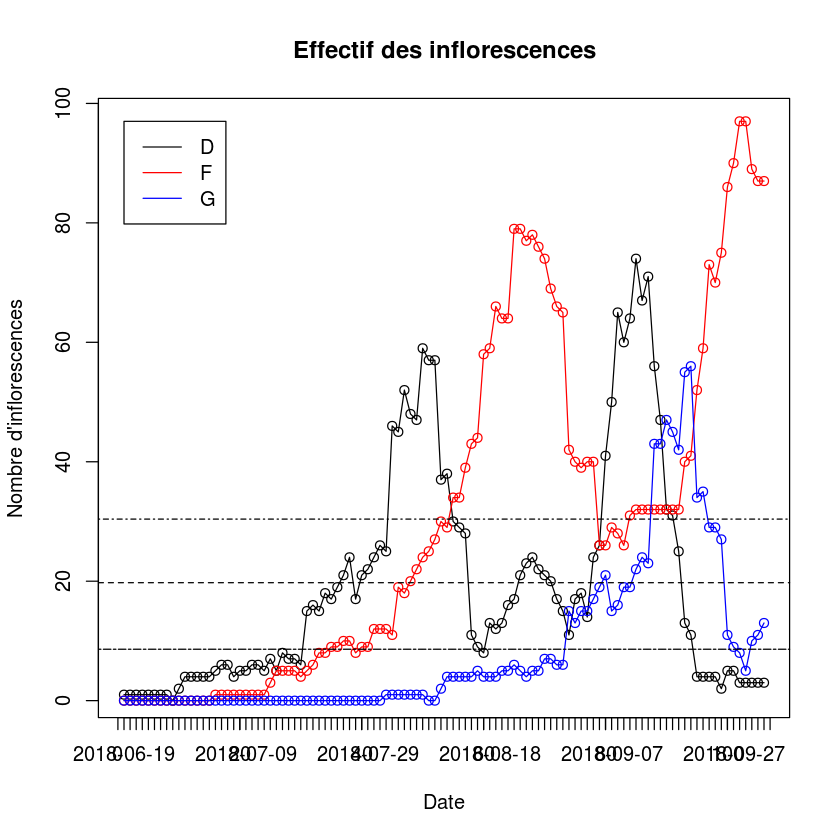

In [4]:
# Affichage des dynamiques de population des inflorescences en fonction des stades D, F et G
plot(stade_1[1,],type='o',xlab="Date","ylab"="Nombre d'inflorescences",ylim=c(1,max(stade_1)))
axis(1,at=1:107, lab=as.character(date))
points(stade_1[3,],type='o',col='red')
points(stade_1[5,],type='o',col='blue')
abline(h=mean(stade_1[1,]),lty=2)
abline(h=mean(stade_1[3,]),lty=4)
abline(h=mean(stade_1[5,]),lty=6)
legend(1, max(stade_1), legend=c("D","F","G"),col=c("black","red", "blue"), lty=1)
title ("Effectif des inflorescences")

## Bloc 2 

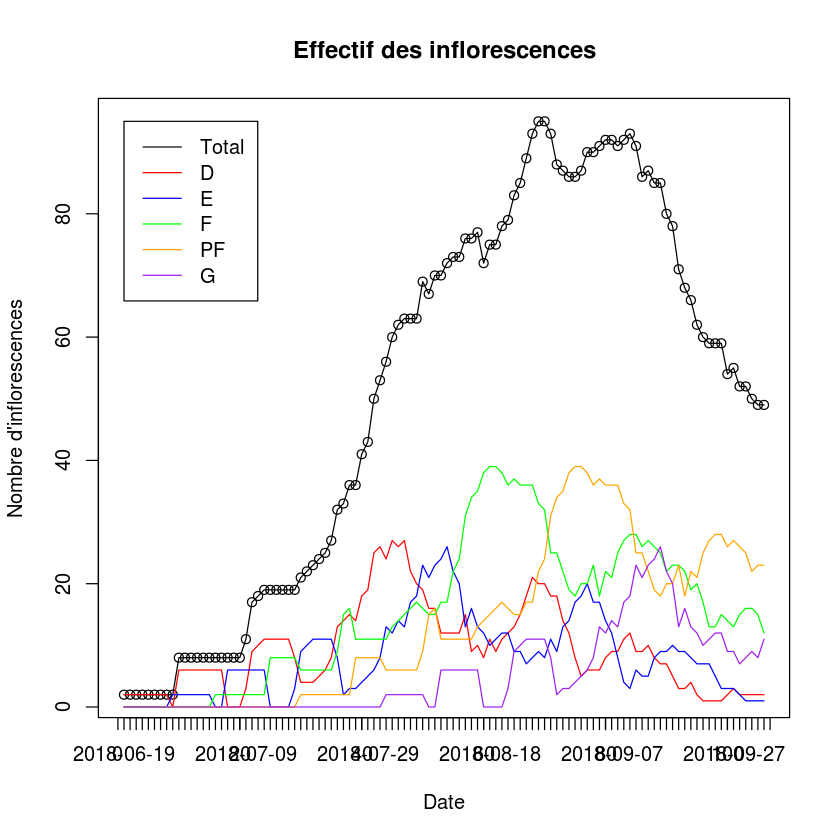

In [5]:
# Affichage des dynamiques de population des inflorescences en fonction de leur stade
plot(apply(stade_2, 2, sum),type='o',xlab="Date","ylab"="Nombre d'inflorescences")
axis(1,at=1:107, lab=as.character(date))
points(stade_2[1,],type='l',col='red')
points(stade_2[2,],type='l',col='blue')
points(stade_2[3,],type='l',col='green')
points(stade_2[4,],type='l',col='orange')
points(stade_2[5,],type='l',col='purple')
legend(1, max(apply(stade_2, 2, sum)), legend=c("Total","D","E","F","PF","G"),col=c("black","red", "blue","green","orange","purple"), lty=1)
title ("Effectif des inflorescences")

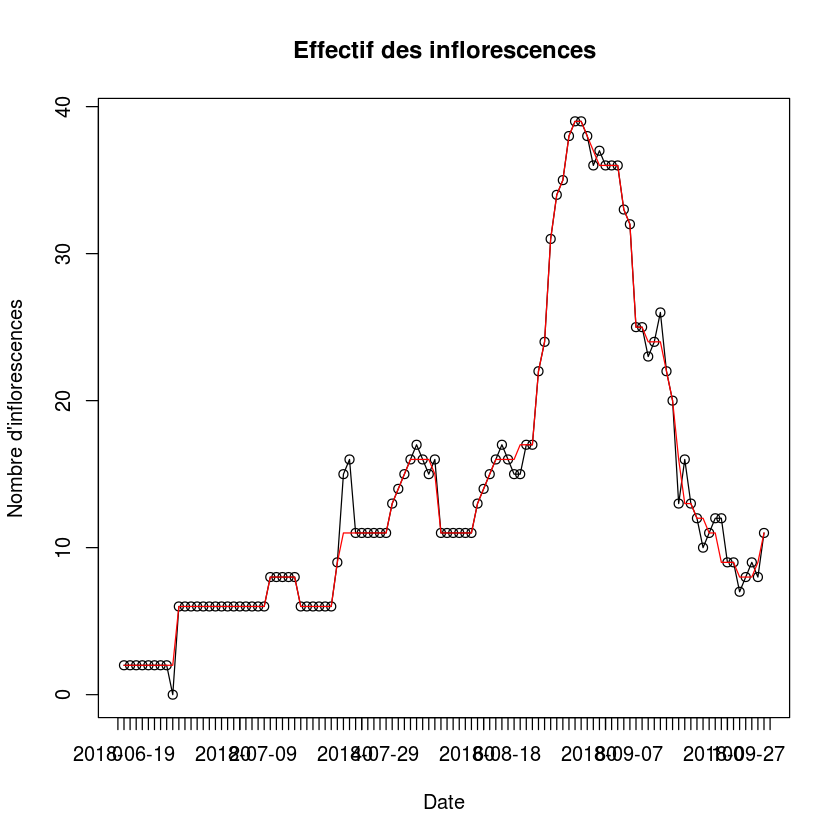

In [6]:
iE = 10
while(stade_2[1,iE]>stade_2[2,iE])
    iE = iE+1

iF = iE+1
while(stade_2[2,iF]>stade_2[3,iF])
    iF = iF+1

iPF = iF+1
while(stade_2[3,iPF]>stade_2[4,iPF])
    iPF = iPF+1

iG = iPF+1
while(stade_2[4,iG]>stade_2[5,iG])
    iG = iG+1

NbInfloDEFPFG_2 = c(stade_2[1,1:(iE-1)],stade_2[2,iE:(iF-1)],stade_2[3,iF:(iPF-1)],stade_2[4,iPF:(iG-1)],stade_2[5,iG:dim(stade_2)[2]])

plot(NbInfloDEFPFG_2,type='o',xlab="Date","ylab"="Nombre d'inflorescences")
axis(1,at=1:107, lab=as.character(date))
points(smooth(NbInfloDEFPFG_2),type='l',col='red')
title ("Effectif des inflorescences")

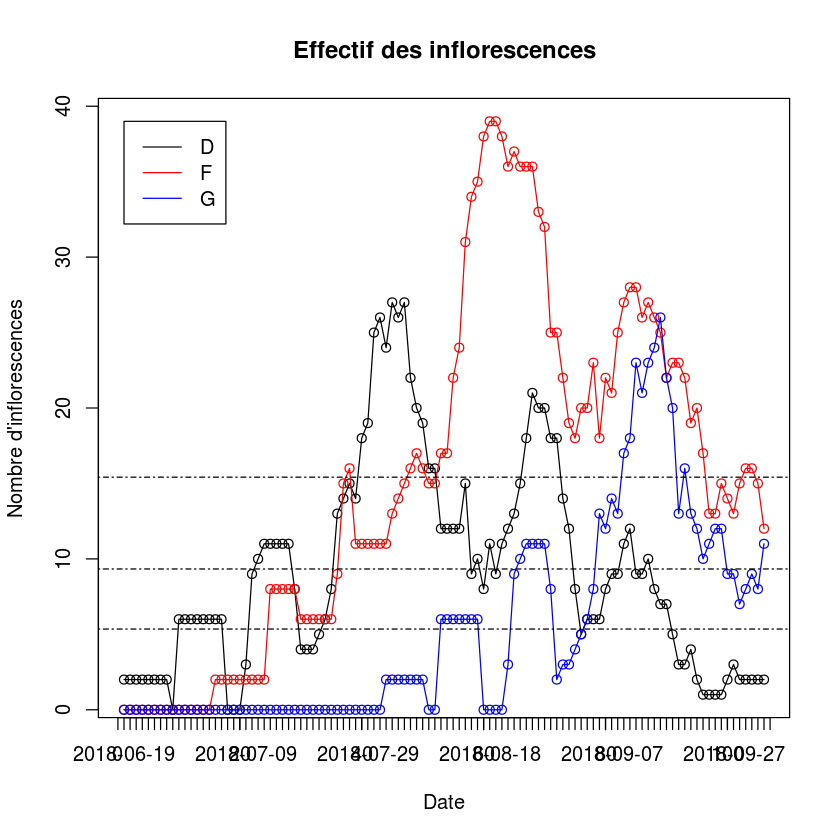

In [7]:
# Affichage des dynamiques de population des inflorescences en fonction des stades D, F et G
plot(stade_2[1,],type='o',xlab="Date","ylab"="Nombre d'inflorescences",ylim=c(1,max(stade_2)))
axis(1,at=1:107, lab=as.character(date))
points(stade_2[3,],type='o',col='red')
points(stade_2[5,],type='o',col='blue')
abline(h=mean(stade_2[1,]),lty=4)
abline(h=mean(stade_2[3,]),lty=4)
abline(h=mean(stade_2[5,]),lty=4)
legend(1, max(stade_2), legend=c("D","F","G"),col=c("black","red", "blue"), lty=1)
title ("Effectif des inflorescences")

## Conclusion

On veut capturer les pics des inflorescences aux stades D, F et G tout en suivant la logique de floraison, c'est à dire en gardant successivement les pics D, F et G. Un pic d'inflorescences au stade D implique un pic d'inflorescences au stade F qui implique un pic d'inflorescences au stade G.

Dans ces données, on voit qu'il y a deux floraisons.

1ere option : On veut capturer la première floraison. Mais si on garde la première floraison, la deuxième vague de floraison sera aussi attaquée par des cécidomyies venant de l'extérieur mais aussi par celles issues des générations produites par les cécidomyies de la première vague.

2eme option : On veut capturer les deux vagues de floraison.

## Option 1

On propose une méthode pour capturer la première vague de floraison. On calcule la moyenne des inflorescences au stade F. Au début, les inflorescences au stade D sont en dessous de cette moyenne, puis augmentent, depassent cette moyenne et diminuent en dessous de cette moyenne à l'instant qu'on note tD. Les inflorescences au stade G sont en dessous de cette moyenne, puis augmente et la dépasse, cette instant est noté tF. 

Ainsi, nous prenons les inflorescences au stade D du début à l'instant tD, les inflorescences au stade F de l'instant tD+1 à l'instant tG-1 et enfin les inflorescences au stade G de l'instant tG à la fin. 

### Bloc 1

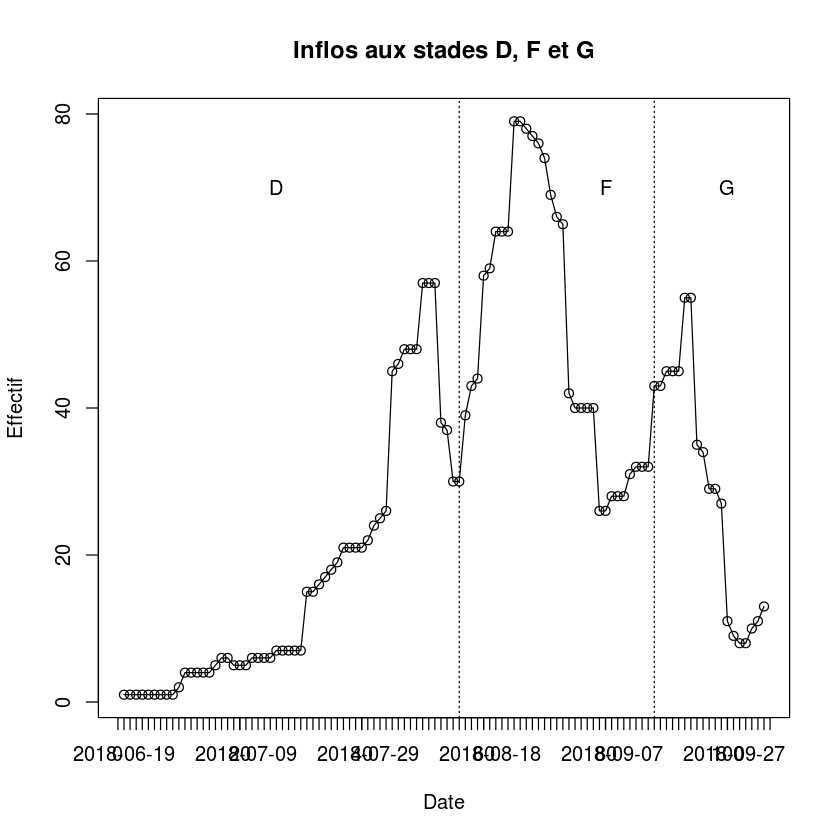

In [9]:
mean_ = mean(stade_1[3,])
t = which(mean_<stade_1[1,])[1]
tD1 = which(mean_>stade_1[1,t:106])[1] + t
tG1 = which(mean_<stade_1[5,])[1]

InflosDFG1 = c(stade_1[1,1:tD1], stade_1[3,(tD1+1):(tG1-1)], stade_1[5,(tG1:106)])
InflosDFG1_sm = smooth(InflosDFG1)
plot(InflosDFG1_sm,type='o',xlab="Date",ylab="Effectif")
axis(1,at=1:107, lab=as.character(date))
abline(v=tD1,lty=3)
abline(v=tG1,lty=3)
title("Inflos aux stades D, F et G")
text(26,70,"D")
text(80,70,"F")
text(100,70,"G")

### Bloc 2

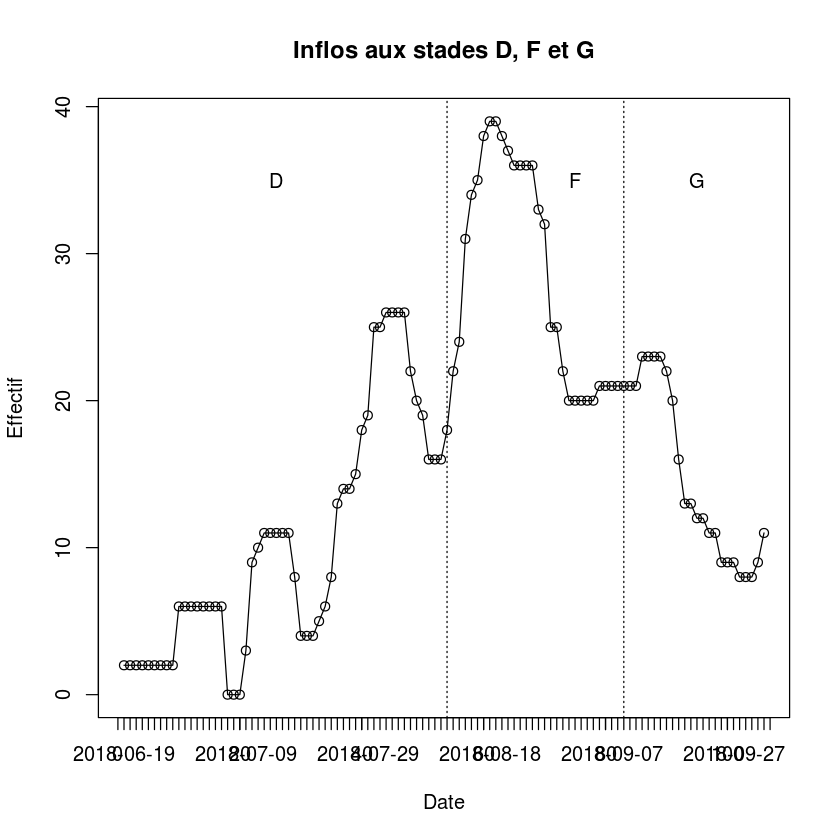

In [10]:
mean_ = mean(stade_2[3,])
t = which(mean_<stade_2[1,])[1]
tD2 = which(mean_>stade_2[1,t:106])[1] + t
tG2 = which(mean_<stade_2[5,])[1]

InflosDFG2 = c(stade_2[1,1:tD2], stade_2[3,(tD2+1):(tG2-1)], stade_2[5,(tG2:106)])
InflosDFG2_sm = smooth(InflosDFG2)
plot(InflosDFG2_sm,type='o',xlab="Date",ylab="Effectif")
axis(1,at=1:107, lab=as.character(date))
abline(v=tD2,lty=3)
abline(v=tG2,lty=3)
title("Inflos aux stades D, F et G")
text(26,35,"D")
text(75,35,"F")
text(95,35,"G")

## Option 2

On a déjà la première vague de floraison. Nous allons y ajouter la seconde en utilisant la même méthode pour la trouver.

### Bloc 1

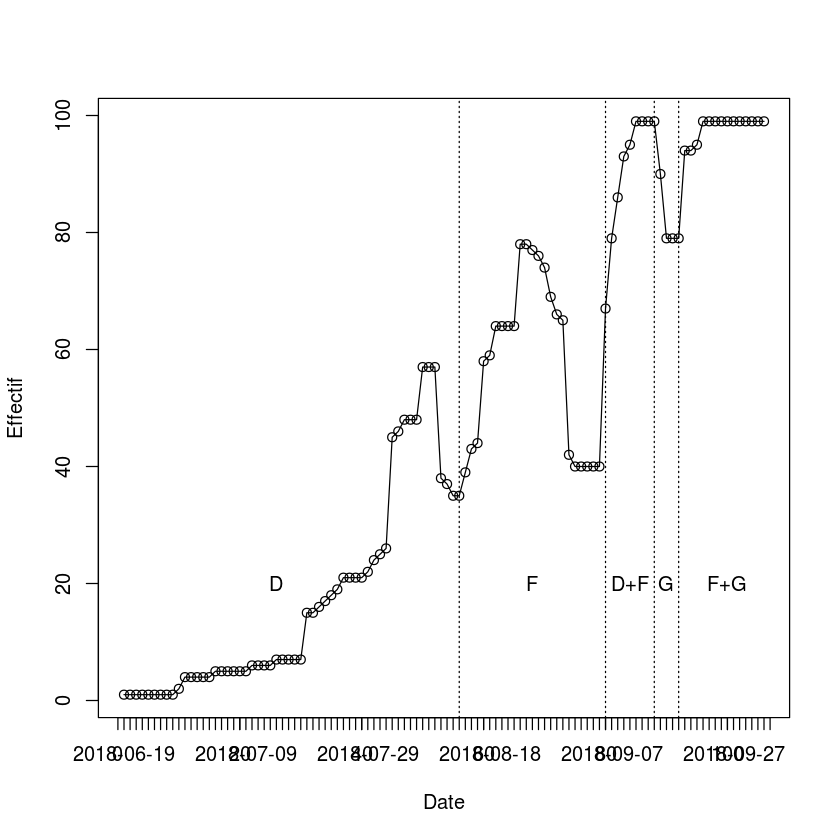

In [11]:
mean_ = mean(stade_1[3,])
tD1bis = which(mean_<stade_1[1,(tD1+1):106])[1] + tD1
tF1bis = which(mean_>stade_1[1,(tD1bis+1):106])[1] + tD1bis

InflosDFG1bis = InflosDFG1
InflosDFG1bis[tD1bis:tF1bis] = InflosDFG1bis[tD1bis:tF1bis] + stade_1[1,tD1bis:tF1bis]
InflosDFG1bis[(tF1bis+1):106] = InflosDFG1bis[(tF1bis+1):106] + stade_1[3,(tF1bis+1):106]
InflosDFG1bis_sm = smooth(InflosDFG1bis)
plot(InflosDFG1bis_sm,type='o',xlab="Date",ylab="Effectif")
axis(1,at=1:107, lab=as.character(date))
abline(v=tD1,lty=3)
abline(v=tG1,lty=3)
abline(v=tD1bis,lty=3)
abline(v=tF1bis,lty=3)
text(26,20,"D")
text(68,20,"F")
text(84,20,"D+F")
text(90,20,"G")
text(100,20,"F+G")

### Bloc 2

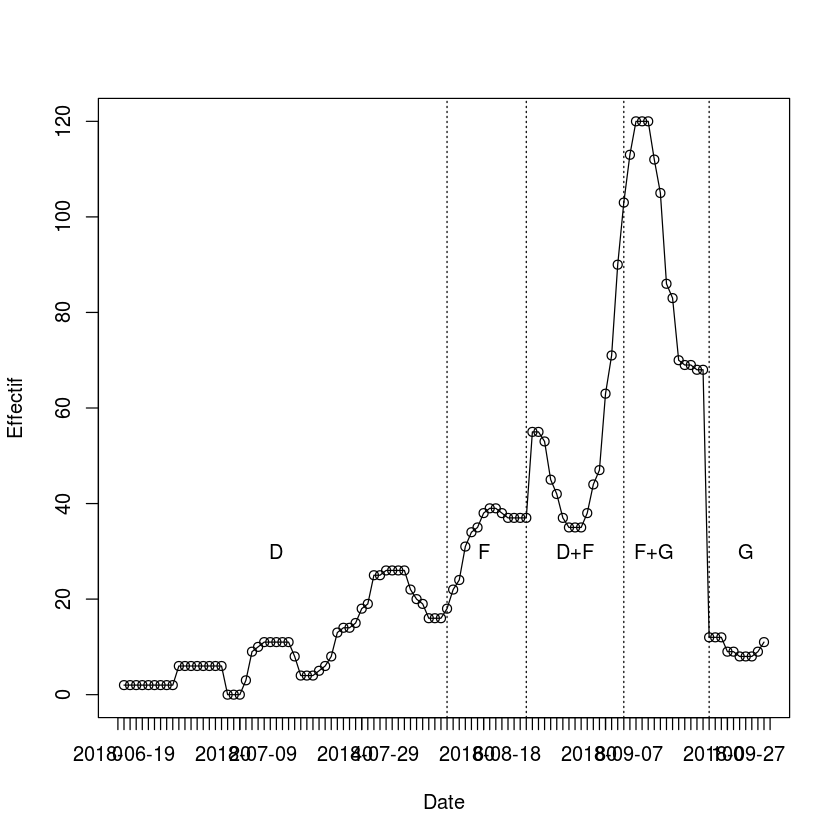

In [12]:
mean_ = mean(stade_2[3,])
tD2bis = which(mean_<stade_2[1,(tD2+1):106])[1] + tD2
tF2bis = which(mean_>stade_2[3,(tD2bis+1):106])[1] + tD2bis

InflosDFG2bis = InflosDFG2
InflosDFG2bis[tD2bis:tF2bis] = InflosDFG2bis[tD2bis:tF2bis] + stade_1[1,tD2bis:tF2bis]
InflosDFG2bis[tG2:tF2bis] = InflosDFG2bis[tG2:tF2bis] + stade_1[3,tG2:tF2bis]
InflosDFG2bis_sm = smooth(InflosDFG2bis)
plot(InflosDFG2bis_sm,type='o',xlab="Date",ylab="Effectif")
axis(1,at=1:107, lab=as.character(date))
abline(v=tD2,lty=3)
abline(v=tG2,lty=3)
abline(v=tD2bis,lty=3)
abline(v=tF2bis,lty=3)
text(26,30,"D")
text(60,30,"F")
text(75,30,"D+F")
text(88,30,"F+G")
text(103,30,"G")

## Conclusion

Je pense qu'il vaut mieux garder l'option une car elle permet la décroissance à la fin. 